1. Load the dataset into python environment

In [123]:
#Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
data = pd.read_csv(r"C:\Users\ACER\Downloads\titanic_dataset.csv")

In [125]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [126]:
data.set_index('PassengerId', inplace=True)

In [127]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset


In [128]:
data.info()  #this method provides the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [129]:
data.shape #To find the dimensions of the dataframe

(891, 11)

In [130]:
data.describe()  #Descriptive Statistics

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Fill in all the missing values present in all the columns in the dataset

In [131]:
data.isnull().sum()   # Check for null values in the entire dataset

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [132]:
# Fill missing values with the mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Fill missing values with the mode for categorical columns
data.fillna(data.mode().iloc[0], inplace=True)


# Verify the filled missing values
null_values = data.isnull().sum()
print("\nAfter filling missing values:")
print(null_values)

C:\Users\ACER\AppData\Local\Temp\ipykernel_1948\3094621073.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)



After filling missing values:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


5.Check and handle outliers in at least 3 columns in the dataset

<Axes: xlabel='SibSp'>

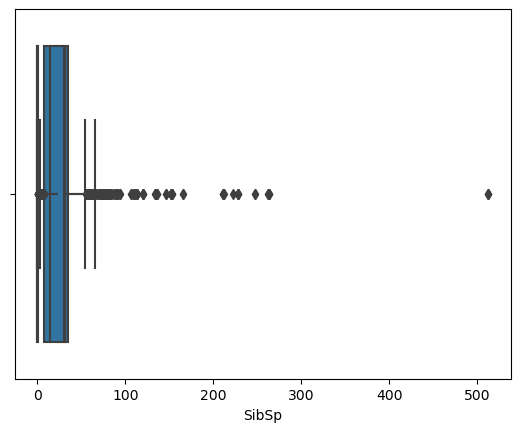

In [133]:
import seaborn as sns

# Checking outliers in 'Age' column
sns.boxplot(x=data['Age'])

# Checking outliers in 'Fare' column
sns.boxplot(x=data['Fare'])

# Checking outliers in 'SibSp' column
sns.boxplot(x=data['SibSp'])


In [134]:
# Make a copy of the original dataset
original_data = data.copy()

# Handling outliers
# Calculate the median for 'Age' column
age_median = data['Age'].median()

# Define the threshold for outliers (e.g., 3 standard deviations from the mean)
age_threshold = 3 * data['Age'].std()

# Replace outliers with the median value
data.loc[data['Age'] > age_threshold, 'Age'] = age_median

from scipy.stats import mstats

# Define the lower and upper percentile values for winsorizing
lower_percentile = 1  # Choose the desired lower percentile
upper_percentile = 99  # Choose the desired upper percentile

# Winsorize the 'Fare' column
data['Fare'] = mstats.winsorize(data['Fare'], limits=(lower_percentile/100, upper_percentile/100))

# Calculate the lower and upper bounds for outliers using the IQR method
q1 = data['SibSp'].quantile(0.25)
q3 = data['SibSp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Remove the outliers beyond the bounds
data = data[(data['SibSp'] >= lower_bound) & (data['SibSp'] <= upper_bound)]


# Print the values before and after handling outliers
print("Before handling outliers:")
print(original_data[['Age', 'Fare', 'SibSp']])

print("\nAfter handling outliers:")
print(data[['Age', 'Fare', 'SibSp']])


Before handling outliers:
                   Age     Fare  SibSp
PassengerId                           
1            22.000000   7.2500      1
2            38.000000  71.2833      1
3            26.000000   7.9250      0
4            35.000000  53.1000      1
5            35.000000   8.0500      0
...                ...      ...    ...
887          27.000000  13.0000      0
888          19.000000  30.0000      0
889          29.699118  23.4500      1
890          26.000000  30.0000      0
891          32.000000   7.7500      0

[891 rows x 3 columns]

After handling outliers:
                   Age  Fare  SibSp
PassengerId                        
1            22.000000   0.0      1
2            38.000000   0.0      1
3            26.000000   0.0      0
4            35.000000   0.0      1
5            35.000000   0.0      0
...                ...   ...    ...
887          27.000000   0.0      0
888          19.000000   0.0      0
889          29.699118   0.0      1
890          26.00000

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [149]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [150]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,845.000000,845.000000,845.000000,845.000000,845.0
mean,2.279290,26.569443,0.313609,0.317160,0.0
std,0.840396,7.405646,0.530909,0.765829,0.0
min,1.000000,0.420000,0.000000,0.000000,0.0
25%,1.000000,23.000000,0.000000,0.000000,0.0
50%,3.000000,29.699118,0.000000,0.000000,0.0
75%,3.000000,29.699118,1.000000,0.000000,0.0
max,3.000000,39.000000,2.000000,6.000000,0.0


In [158]:
x.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [163]:
X1 = x.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [164]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,0.0
2,1,38.0,1,0,0.0
3,3,26.0,0,0,0.0
4,1,35.0,1,0,0.0
5,3,35.0,0,0,0.0


In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
min_max = MinMaxScaler()

In [167]:
X1 = min_max.fit_transform(X1)

In [169]:
type(X1)

numpy.ndarray

In [173]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [174]:
X1 = pd.DataFrame(X1, columns=['Name','Sex','Ticket','Cabin','Embarked'])

In [176]:
X1.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,845.000000,845.000000,845.000000,845.000000,845.0
mean,0.639645,0.677798,0.156805,0.052860,0.0
std,0.420198,0.191956,0.265454,0.127638,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.585277,0.000000,0.000000,0.0
50%,1.000000,0.758920,0.000000,0.000000,0.0
75%,1.000000,0.758920,0.500000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0
